<a href="https://colab.research.google.com/github/anirbrhm/Deep-Learning/blob/main/FeedForwardNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Outline :**

1. Generate data that is not linearly seperable 
2. Train with a sigmoid Neuron and see its performance 
3. Write from scratch our first feed forward Neural Network 
4. Train the FF network on the data and compare with the Sigmoid Neuron 
5. Write a general class for a FF network 
6. Train generic class on binary classification 
7. Generate data for multi class classification 
8. Train a FF network for 7 
9. Use softmax as the output layer and cross-entropy loss function 
10. Train with 8 for multiclass classification 
11. Exercises on other data sets  

# Setup

In [6]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors
from tqdm import tqdm_notebook
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

from sklearn.datasets import make_blobs
from sklearn.preprocessing import OneHotEncoder

In [7]:
class SigmoidNeuron:
  
  def __init__(self):
    self.w = None 
    self.b = None 
  
  def perceptron(self,x): 
    return np.dot(x,self.w.T) + self.b 
  
  def sigmoid(self,x):
    return 1.0/(1.0 + np.exp(-x)) 

  def grad_w_mse(self,x,y): 
    y_pred = self.sigmoid(self.perceptron(x)) 
    return (y_pred-y) * y_pred * (1-y_pred) * x 

  def grad_b_mse(self,x,y):
    y_pred = self.sigmoid(self.perceptron(x)) 
    return (y_pred-y) * y_pred * (1-y_pred) 

  def grad_w_ce(self,x,y):
    y_pred = self.sigmoid(self.perceptron(x))
    if y == 0 : 
      return y_pred * x 
    elif y == 1 : 
      return -1 * (1 - y_pred) * x 
    else : 
      raise ValueError("y should be 0 or 1") 
    
  def grad_b_ce(self,x,y): 
    y_pred = self.sigmoid(self.perceptron(x))
    if y == 0 : 
      return y_pred
    elif y == 1 : 
      return -1 * (1 - y_pred)
    else : 
      raise ValueError("y should be 0 or 1")

  def fit(self,X,Y,epochs=1,lr=1,initialize = True, loss_fn = "mse",display_loss = False):

    if(initialize):
      # initialize w and b 
      self.w = np.random.randn(1,X.shape[1]) 
      self.b = 0  

    if(display_loss) : 
      loss = []
    
    for i in tqdm_notebook(range(epochs), total = epochs, unit = "epoch"):
      dw = 0 
      db = 0 
      for x,y in zip(X,Y):
        if loss_fn == "mse" : 
          dw += self.grad_w_mse(x,y) 
          db += self.grad_b_mse(x,y) 
        elif loss_fn == "ce" : 
          dw += self.grad_w_ce(x,y) 
          db += self.grad_b_ce(x,y) 
      m = X.shape[1]
      self.w -= lr * dw / m 
      self.b -= lr * db / m 

      if(display_loss):
        Y_pred = self.sigmoid(self.perceptron(X))
        if loss_fn == "mse" : 
          loss.append(mean_squared_error(Y_pred,Y))
        elif loss_fn == "ce" : 
          loss.append(log_loss(Y,Y_pred))   

    if(display_loss):
      plt.plot(np.asarray(loss))
      plt.xlabel("Epochs")
      if loss_fn == "mse" : 
        plt.ylabel("Mean Squared Error")
      elif loss_fn == "ce" : 
        plt.ylabel("Log Loss")
      plt.show() 
    
  def predict(self,X):
    Y_pred = []
    for x in X : 
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred) 
    return np.array(Y_pred)

In [8]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"]) 

# Generate Data

In [9]:
data, labels = make_blobs(n_samples = 1000, centers = 4, n_features = 2, random_state = 0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


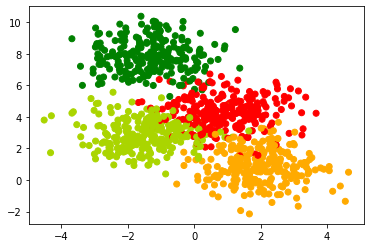

In [10]:
plt.scatter(data[:,0], data[:,1], c = labels, cmap = my_cmap)
plt.show()

In [11]:
labels_orig = labels 
labels = np.mod(labels_orig, 2) 

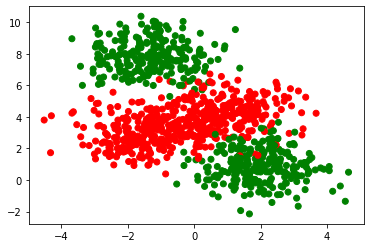

In [12]:
plt.scatter(data[:,0], data[:,1], c = labels, cmap = my_cmap)
plt.show()

In [13]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify = labels, random_state = 0 )
print(X_train.shape, X_val.shape) # val is validation set 

(750, 2) (250, 2)


### SN Classification

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


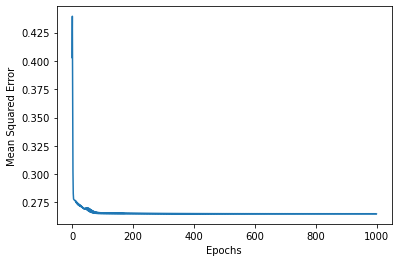

In [14]:
sn = SigmoidNeuron()
sn.fit(X_train,Y_train,epochs = 1000, lr = 0.5, display_loss = True)

In [15]:
Y_pred_train = sn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype(np.int).ravel()
Y_pred_test = sn.predict(X_val)
Y_pred_binarised_val = (Y_pred_test >= 0.5).astype(np.int).ravel()

accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train) 
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

print("Training accuracy : ", round(accuracy_train,2))
print("Validation accuracy : ", round(accuracy_val,2)) 

Training accuracy :  0.73
Validation accuracy :  0.72


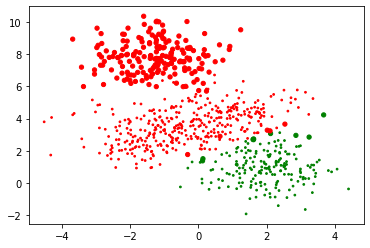

In [16]:
plt.scatter(X_train[:,0], X_train[:,1], c = Y_pred_binarised_train, cmap = my_cmap, s = 15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show() # if size is big then it is wrongly predicted and if small then correctly predicted

# Our first FF Network

In [19]:
class FirstFFNetwork : 

  def __init__(self):
    self.w1 = np.random.randn()
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w4 = np.random.randn()
    self.w5 = np.random.randn()
    self.w6 = np.random.randn()
    self.b1 = 0 
    self.b2 = 0 
    self.b3 = 0 
  
  def sigmoid(self,x):
    return 1.0/(1.0 + np.exp(-x))

  def forward_pass(self,x):
    self.x1 , self.x2 = x 
    
    self.a1 = self.x1*self.w1 + self.x2*self.w2 + self.b1 
    self.h1 = self.sigmoid(self.a1) 

    self.a2 = self.x1*self.w3 + self.x2*self.w4 + self.b2 
    self.h2 = self.sigmoid(self.a2) 

    self.a3 = self.h1*self.w5 + self.h2*self.w6 + self.b3 
    self.h3 = self.sigmoid(self.a3) 

    return self.h3 

  def grad(self,x,y):
    self.forward_pass(x) 

    self.dw5 = (self.h3-y)*(self.h3)*(1-self.h3)*(self.h1)
    self.dw6 = (self.h3-y)*(self.h3)*(1-self.h3)*(self.h2)
    self.db3 = (self.h3-y)*(self.h3)*(1-self.h3)

    self.dw1 = (self.h3-y)*(self.h3)*(1-self.h3)*(self.w5)*(self.h1)*(1-self.h1)*(self.x1)
    self.dw2 = (self.h3-y)*(self.h3)*(1-self.h3)*(self.w5)*(self.h1)*(1-self.h1)*(self.x2)
    self.db1 = (self.h3-y)*(self.h3)*(1-self.h3)*(self.w5)*(self.h1)*(1-self.h1)

    self.dw3 = (self.h3-y)*(self.h3)*(1-self.h3)*(self.w6)*(self.h2)*(1-self.h2)*(self.x1)
    self.dw4 = (self.h3-y)*(self.h3)*(1-self.h3)*(self.w6)*(self.h2)*(1-self.h2)*(self.x2)
    self.db2 = (self.h3-y)*(self.h3)*(1-self.h3)*(self.w6)*(self.h2)*(1-self.h2)

  def fit(self,X,Y,epochs = 1,lr = 1,initialize = True, display_loss = False): 
    # initialize w , b 
    if(initialize):
      self.w1 = np.random.randn()
      self.w1 = np.random.randn()
      self.w1 = np.random.randn()
      self.w1 = np.random.randn()
      self.w1 = np.random.randn()
      self.w1 = np.random.randn()
      self.b1 = 0 
      self.b2 = 0 
      self.b3 = 0 

    if(display_loss):
      loss = []

    for i in tqdm_notebook(range(epochs), total = epochs, unit = "epoch"):
      dw1, dw2, dw3, dw4, dw5, dw6, db1, db2, db3 = [0]*9 ; 
      for x,y in zip(X,Y):
        self.grad(x,y) 
        dw1 += self.dw1
        dw2 += self.dw2
        dw3 += self.dw3
        dw4 += self.dw4
        dw5 += self.dw5
        dw6 += self.dw6
        db1 += self.db1
        db2 += self.db2
        db3 += self.db3
      
      m = X.shape[1] 
      self.w1 -= (lr * dw1)/m
      self.w2 -= (lr * dw2)/m
      self.w3 -= (lr * dw3)/m
      self.w4 -= (lr * dw4)/m
      self.w5 -= (lr * dw5)/m
      self.w6 -= (lr * dw6)/m
      self.b1 -= (lr * db1)/m
      self.b2 -= (lr * db2)/m
      self.b3 -= (lr * db3)/m

      if(display_loss):
        Y_pred = self.predict(X) 
        loss.append(mean_squared_error(Y_pred,Y))

    if(display_loss):
      plt.plot(np.asarray(loss))
      plt.xlabel("Epochs")
      plt.ylabel("Mean Squared Error Loss")
      plt.show()

  def predict(self,X):
    Y_pred = []
    for x in X : 
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred) 
    return np.array(Y_pred)

# FFNetwork Classification

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:62: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


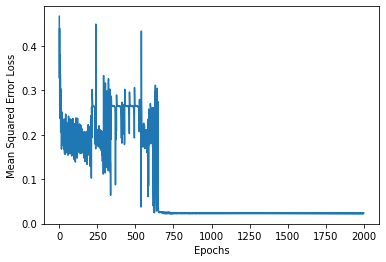

In [23]:
ffn = FirstFFNetwork()
ffn.fit(X_train, Y_train, epochs=2000, lr=0.2, display_loss=True)

In [24]:
Y_pred_train = ffn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype(np.int).ravel()
Y_pred_test = ffn.predict(X_val)
Y_pred_binarised_val = (Y_pred_test >= 0.5).astype(np.int).ravel()

accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train) 
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

print("Training accuracy : ", round(accuracy_train,2))
print("Validation accuracy : ", round(accuracy_val,2)) 

Training accuracy :  0.97
Validation accuracy :  0.93


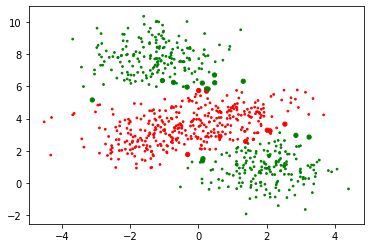

In [25]:
plt.scatter(X_train[:,0], X_train[:,1], c = Y_pred_binarised_train, cmap = my_cmap, s = 15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show() # if size is big then it is wrongly predicted and if small then correctly predicted

# Feed Forward Neural Network



In [ ]:
class FFSNNetwork: 
  def __init__(self, n_inputs, hidden_sizes=[2]): # the hidden_sizes is a list of the number of neurons in each layer 
    self.nx = n_inputs # nx is the number of inputs 
    self.ny = 1 # ny is the number of inputs , 1 for binary classification , would need more for multiclass classification
    self.nh = len(hidden_sizes) # number of hidden layers
    self.sizes = [self.nx] + hidden_sizes + [self.ny] # this is basically the whole network 

    self.W = {} # each of the weight matrices is stored as one of the items of a dictionary 
    self.B = {} 
    for i in range(self.nh + 1):
      self.W[i+1] = np.random.randn(self.sizes[i],self.sizes[i+1]) 
      self.B[i+1] = np.zeros(1,self.sizes[i+1]) 

  def sigmoid(self,x):
    return 1.0/(1.0 + np.exp(-x)) 
  
  def forward_pass(self,x):
    self.A = {}
    self.H = {} 
    self.H[0] = x.reshape[1,-1] # H[0] is basically the input vector, flattening the array by saying it to have 1 row and as many columns as you want
    for i in range(self.nh + 1):
      self.A[i+1] = np.matmul(self.H[i],self.W[i+1]) + self.B[i+1] 
      self.H[i+1] = self.sigmoid(self.A[i+1]) 
    return self.H[self.nh+1]

  def fit(self, X, Y, epochs = 1, lr = 1, initialize = True, display_loss = False):
    if (initialize):
      for i in range(self.nh+1):
        self.W[i+1] = np.random.randn(self.sizes[i],self.sizes[i+1]) 
        self.B[i+1] = np.zeros(1,self.sizes[i+1])
      
    if (display_loss):
      loss = [] 

    for e in tqdm_notebook(range(epochs), total = epochs, unit = "epoch"):
      dW = {}
      dB = {}
      for i in range(self.nh+1):
        self.dW[i+1] = np.zeros(self.sizes[i],self.sizes[i+1]) 
        self.B[i+1] = np.zeros(1,self.sizes[i+1])
      for x,y in zip(X,Y):
        self.grad(x,y) 
        for i in range(self.nh + 1):
          dW[i+1] += self.dW[i+1]
          dB[i+1] += self.dB[i+1]

      m = X.shape[1]
      for i in range(self.nh + 1):
        self.W[i+1] -= lr * dW[i+1] / m 
        self.B[i+1] -= lr * dB[i+1] / m 

      if(display_loss):
        Y_pred = self.predict(x)
        loss.append(mean_squared_error(Y_pred,Y)) 
    
    if(display_loss):
      plt.plot(np.asarray(loss))
      plt.xlabel("Epochs")
      plt.ylabel("Mean Squared Error Loss")
      plt.show()

  def predict(self,X):
    Y_pred = []
    for x in X : 
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred) 
    return np.array(Y_pred)


In [ ]:
ffsnn = FFSNNetwork(2, [2, 3])
ffsnn.fit(X_train, Y_train, epochs = 1000, lr = 0.001, display_loss = True)  

In [ ]:
Y_pred_train = ffsnn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype(np.int).ravel()
Y_pred_test = ffsnn.predict(X_val)
Y_pred_binarised_val = (Y_pred_test >= 0.5).astype(np.int).ravel()

accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train) 
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

print("Training accuracy : ", round(accuracy_train,2))
print("Validation accuracy : ", round(accuracy_val,2)) 

In [ ]:
plt.scatter(X_train[:,0], X_train[:,1], c = Y_pred_binarised_train, cmap = my_cmap, s = 15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show() # if size is big then it is wrongly predicted and if small then correctly predicted